In [532]:
import re
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import cluster, metrics, datasets

In [533]:
pd.set_option('display.max_columns', None)
d=pd.read_csv("data/tot_adv_shooting.csv",encoding="utf-8")
t=pd.read_csv("data/test_data_set.csv",encoding="utf-8")

modern_data = d.loc[(d["G"]>27) & (d["MP"]>350) & (pd.notnull(d["PPS_00-02 At Rim"]))]
modern_data = modern_data.replace({"Pos": {"PG":"G", "SG":"G","PG-SG":"G","SG-PG":"G","SG-SF":"G","SF-SG":"F","SF":"F","SF-PF":"F","PF":"F","PF-SF":"F","SG-PF":"F","PG-SF":"F","C-PF":"C","PF-C":"C","C-SF":"C"}})
modern_data = modern_data.append(t)
modern_data

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,formatname,playername,PPS_00-02 At Rim,PPS_03-08 Near Rim,PPS_09-12 Short Range,PPS_13-17 Mid Range,PPS_18-23 Long Jumper,PPS_24-27 Three,PPS_28-34 Deep,PPS_35-46 Near Half,PPS_47-94 Backcourt,Points_00-02 At Rim,Points_03-08 Near Rim,Points_09-12 Short Range,Points_13-17 Mid Range,Points_18-23 Long Jumper,Points_24-27 Three,Points_28-34 Deep,Points_35-46 Near Half,Points_47-94 Backcourt
10728,1997.0,Mahmoud Abdul-Rauf,G,27.0,SAC,75.0,2131.0,13.2,0.524,0.266,0.147,0.9,5.9,3.3,15.8,1.4,0.20,10.8,23.2,2.0,0.7,2.7,0.060,-0.2,-3.4,-3.5,-0.800,411.0,924.0,0.4450,94.0,246.0,0.3820,317.0,678.0,0.468,0.496,115.0,136.0,0.846000,16.0,106.0,122.0,189.0,56.0,6.0,119.0,174.0,1031.0,MahmoudAbdulRauf,Mahmoud Abdul-Rauf,0.967742,0.666667,1.098039,0.898678,0.890220,1.067797,1.000000,0.0,0.0,60.0,12.0,56.0,204.0,446.0,63.0,3.0,0.0,0.0
10729,1997.0,Shareef Abdur-Rahim,F,20.0,VAN,80.0,2802.0,17.4,0.518,0.022,0.428,8.8,14.2,11.5,12.1,1.5,2.20,13.5,27.6,1.7,1.2,2.9,0.049,-0.8,-1.2,-2.0,0.000,550.0,1214.0,0.4530,7.0,27.0,0.2590,543.0,1187.0,0.457,0.456,387.0,519.0,0.746000,216.0,339.0,555.0,175.0,79.0,79.0,225.0,199.0,1494.0,ShareefAbdurRahim,Shareef Abdur-Rahim,1.054945,0.848485,0.746032,0.623377,0.793388,0.428571,0.000000,0.0,0.0,672.0,140.0,94.0,96.0,96.0,3.0,0.0,0.0,0.0
10730,1997.0,Rafael Addison,F,32.0,CHH,41.0,355.0,10.6,0.476,0.164,0.230,6.7,8.6,7.7,15.5,1.2,0.60,11.2,20.1,0.2,0.1,0.4,0.048,-1.8,-2.5,-4.3,-0.200,49.0,122.0,0.4020,8.0,20.0,0.4000,41.0,102.0,0.402,0.434,22.0,28.0,0.786000,19.0,26.0,45.0,34.0,8.0,3.0,17.0,52.0,128.0,RafaelAddison,Rafael Addison,0.648649,0.285714,0.500000,0.823529,1.117647,1.200000,0.000000,0.0,0.0,24.0,2.0,2.0,28.0,38.0,6.0,0.0,0.0,0.0
10731,1997.0,Cory Alexander,G,23.0,SAS,80.0,1454.0,14.3,0.528,0.514,0.263,2.3,8.0,5.1,30.0,3.1,0.90,21.1,22.2,0.5,0.6,1.1,0.035,0.8,-2.1,-1.3,0.200,194.0,490.0,0.3960,94.0,252.0,0.3730,100.0,238.0,0.420,0.492,95.0,129.0,0.736000,29.0,94.0,123.0,254.0,82.0,16.0,146.0,148.0,577.0,CoryAlexander,Cory Alexander,0.836364,1.000000,0.933333,0.558140,0.784483,1.260870,0.000000,0.0,0.0,92.0,18.0,14.0,24.0,182.0,87.0,0.0,0.0,0.0
10732,1997.0,Jerome Allen,G,24.0,TOT,76.0,943.0,8.7,0.451,0.421,0.326,3.1,9.0,6.1,25.3,1.8,0.30,21.4,15.6,-0.3,0.8,0.4,0.021,-2.3,-1.1,-3.5,-0.300,78.0,221.0,0.3530,30.0,93.0,0.3230,48.0,128.0,0.375,0.421,42.0,72.0,0.583000,25.0,73.0,98.0,152.0,31.0,4.0,69.0,84.0,228.0,JeromeAllen,Jerome Allen,0.897436,0.444444,0.857143,0.727273,0.692308,0.521739,0.000000,0.0,0.0,70.0,8.0,6.0,8.0,54.0,12.0,0.0,0.0,0.0
10733,1997.0,Ray Allen,G,21.0,MIL,82.0,2532.0,14.6,0.541,0.328,0.274,4.7,11.0,7.9,13.9,1.6,0.30,12.8,21.4,3.3,1.5,4.9,0.092,1.6,-1.2,0.3,1.500,390.0,908.0,0.4300,117.0,298.0,0.3930,273.0,610.0,0.448,0.494,205.0,249.0,0.823000,97.0,229.0,326.0,210.0,75.0,10.0,149.0,218.0,1102.0,RayAllen,Ray Allen,0.937238,1.000000,0.813953,0.840237,0.871287,1.066667,0.000000,0.0,1.0,224.0,70.0,70.0,142.0,176.0,144.0,0.0,0.0,3.0
10736,1997.0,Greg Anderson,C,32.0,SAS,82.0,1659.0,11.4,0.531,0.004,0.355,11.0,21.8,16.2,3.2,2.1,3.20,19.4,10.5,0.7,1.5,2.2,0.064,-3.1,1.4,-1.6,0.200,130.0,262.0,0.4960,0.0,1.0,0.0000,130.0,261.0,0.498,0.496,62.0,93.0,0.667000,157.0,291.0,448.0,34.0,63.0,67.0,73.0,225.0,322.0,GregAnderson,Greg Anderson,1.029787,0.800000,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.0,242.0,16.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
10737,1997.0,Kenny Anderson,G,26.0,POR,82.0,3081.0,19.5,0.540,0.322,0.383,3.6,10.2,7.0,31.7,2.8,0.40,12.7,22.2,8.0,4.4,12.4,0.193,4.3,0.8,5.0,5.500,485.0,1137.0,0.4270,132.0,366.0,0.3610,353.0,771.0,0.458,0.485,334.0,435.0,0.768000,91.0,272.0,363.0,584.0,162.0,15.0,193.0,222.0,1436.0,KennyAnderson,Kenny Anderson,1.034483,0.658537,0.600000,0.793388,0.804598,0.907895,1.000000,0.0,0.0,450.0,54.0,42.0,96.0,280.0,69.0,3.0,0.0,0.0
10738,1997.0,Nick Anderson,G,29

In [534]:
for stat in ["TRB","AST","STL","BLK","TOV","PF","PTS"]:
    modern_data[str(stat+"/36")] = modern_data[stat] / (modern_data["MP"]/36)
modern_data

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,formatname,playername,PPS_00-02 At Rim,PPS_03-08 Near Rim,PPS_09-12 Short Range,PPS_13-17 Mid Range,PPS_18-23 Long Jumper,PPS_24-27 Three,PPS_28-34 Deep,PPS_35-46 Near Half,PPS_47-94 Backcourt,Points_00-02 At Rim,Points_03-08 Near Rim,Points_09-12 Short Range,Points_13-17 Mid Range,Points_18-23 Long Jumper,Points_24-27 Three,Points_28-34 Deep,Points_35-46 Near Half,Points_47-94 Backcourt,TRB/36,AST/36,STL/36,BLK/36,TOV/36,PF/36,PTS/36
10728,1997.0,Mahmoud Abdul-Rauf,G,27.0,SAC,75.0,2131.0,13.2,0.524,0.266,0.147,0.9,5.9,3.3,15.8,1.4,0.20,10.8,23.2,2.0,0.7,2.7,0.060,-0.2,-3.4,-3.5,-0.800,411.0,924.0,0.4450,94.0,246.0,0.3820,317.0,678.0,0.468,0.496,115.0,136.0,0.846000,16.0,106.0,122.0,189.0,56.0,6.0,119.0,174.0,1031.0,MahmoudAbdulRauf,Mahmoud Abdul-Rauf,0.967742,0.666667,1.098039,0.898678,0.890220,1.067797,1.000000,0.0,0.0,60.0,12.0,56.0,204.0,446.0,63.0,3.0,0.0,0.0,2.061004,3.192867,0.946035,0.101361,2.010324,2.939465,17.417175
10729,1997.0,Shareef Abdur-Rahim,F,20.0,VAN,80.0,2802.0,17.4,0.518,0.022,0.428,8.8,14.2,11.5,12.1,1.5,2.20,13.5,27.6,1.7,1.2,2.9,0.049,-0.8,-1.2,-2.0,0.000,550.0,1214.0,0.4530,7.0,27.0,0.2590,543.0,1187.0,0.457,0.456,387.0,519.0,0.746000,216.0,339.0,555.0,175.0,79.0,79.0,225.0,199.0,1494.0,ShareefAbdurRahim,Shareef Abdur-Rahim,1.054945,0.848485,0.746032,0.623377,0.793388,0.428571,0.000000,0.0,0.0,672.0,140.0,94.0,96.0,96.0,3.0,0.0,0.0,0.0,7.130621,2.248394,1.014989,1.014989,2.890792,2.556745,19.194861
10730,1997.0,Rafael Addison,F,32.0,CHH,41.0,355.0,10.6,0.476,0.164,0.230,6.7,8.6,7.7,15.5,1.2,0.60,11.2,20.1,0.2,0.1,0.4,0.048,-1.8,-2.5,-4.3,-0.200,49.0,122.0,0.4020,8.0,20.0,0.4000,41.0,102.0,0.402,0.434,22.0,28.0,0.786000,19.0,26.0,45.0,34.0,8.0,3.0,17.0,52.0,128.0,RafaelAddison,Rafael Addison,0.648649,0.285714,0.500000,0.823529,1.117647,1.200000,0.000000,0.0,0.0,24.0,2.0,2.0,28.0,38.0,6.0,0.0,0.0,0.0,4.563380,3.447887,0.811268,0.304225,1.723944,5.273239,12.980282
10731,1997.0,Cory Alexander,G,23.0,SAS,80.0,1454.0,14.3,0.528,0.514,0.263,2.3,8.0,5.1,30.0,3.1,0.90,21.1,22.2,0.5,0.6,1.1,0.035,0.8,-2.1,-1.3,0.200,194.0,490.0,0.3960,94.0,252.0,0.3730,100.0,238.0,0.420,0.492,95.0,129.0,0.736000,29.0,94.0,123.0,254.0,82.0,16.0,146.0,148.0,577.0,CoryAlexander,Cory Alexander,0.836364,1.000000,0.933333,0.558140,0.784483,1.260870,0.000000,0.0,0.0,92.0,18.0,14.0,24.0,182.0,87.0,0.0,0.0,0.0,3.045392,6.288858,2.030261,0.396149,3.614856,3.664374,14.286107
10732,1997.0,Jerome Allen,G,24.0,TOT,76.0,943.0,8.7,0.451,0.421,0.326,3.1,9.0,6.1,25.3,1.8,0.30,21.4,15.6,-0.3,0.8,0.4,0.021,-2.3,-1.1,-3.5,-0.300,78.0,221.0,0.3530,30.0,93.0,0.3230,48.0,128.0,0.375,0.421,42.0,72.0,0.583000,25.0,73.0,98.0,152.0,31.0,4.0,69.0,84.0,228.0,JeromeAllen,Jerome Allen,0.897436,0.444444,0.857143,0.727273,0.692308,0.521739,0.000000,0.0,0.0,70.0,8.0,6.0,8.0,54.0,12.0,0.0,0.0,0.0,3.741251,5.802757,1.183457,0.152704,2.634146,3.206787,8.704136
10733,1997.0,Ray Allen,G,21.0,MIL,82.0,2532.0,14.6,0.541,0.328,0.274,4.7,11.0,7.9,13.9,1.6,0.30,12.8,21.4,3.3,1.5,4.9,0.092,1.6,-1.2,0.3,1.500,390.0,908.0,0.4300,117.0,298.0,0.3930,273.0,610.0,0.448,0.494,205.0,249.0,0.823000,97.0,229.0,326.0,210.0,75.0,10.0,149.0,218.0,1102.0,RayAllen,Ray Allen,0.937238,1.000000,0.813953,0.840237,0.871287,1.066667,0.000000,0.0,1.0,224.0,70.0,70.0,142.0,176.0,144.0,0.0,0.0,3.0,4.635071,2.985782,1.066351,0.142180,2.118483,3.099526,15.668246
10736,1997.0,Greg Anderson,C,32.0,SAS,82.0,1659.0,11.4,0.531,0.004,0.355,11.0,21.8,16.2,3.2,2.1,3.20,19.4,10.5,0.7,1.5,2.2,0.064,-3.1,1.4,-1.6,0.200,130.0,262.0,0.4960,0.0,1.0,0.0000,130.0,261.0,0.498,0.496,62.0,93.0,0.667000,157.0,291.0,448.0,34.0,63.0,67.0,73.0,225.0,322.0,GregAnderson,Greg Anderson,1.029787,0.800000,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.0,242.0,16.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,9.721519,0.737794,1.367089,1.

In [535]:
X = modern_data[["3PAr", "FTr", "TRB%", "AST%", "STL%", "BLK%", "TOV%", "USG%", "TS%", "AST/36", "PTS/36", "DWS", "DBPM","PPS_00-02 At Rim","PPS_03-08 Near Rim","PPS_09-12 Short Range","PPS_13-17 Mid Range","PPS_18-23 Long Jumper","PPS_24-27 Three","PPS_28-34 Deep"]]#[["PPS_00-02 At Rim","PPS_03-08 Near Rim","PPS_09-12 Short Range","PPS_13-17 Mid Range","PPS_18-23 Long Jumper","PPS_24-27 Three","PPS_28-34 Deep","PPS_35-46 Near Half","TRB/36", "AST/36", "STL/36", "BLK/36", "PTS/36", "OWS", "DWS", "OBPM", "DBPM", "3PAr", "FTr", "TRB%", "AST%", "STL%", "BLK%", "TOV%", "USG%"]]
y = modern_data["Pos"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print("Cumulative Explained Variance:", pca.explained_variance_ratio_.sum())

Cumulative Explained Variance: 0.38657730430587145


In [536]:
LDA = LinearDiscriminantAnalysis(n_components=2, solver='eigen')
LDA_reduced_df = LDA.fit(X_scaled,y).transform(X_scaled)
LDA.score(X_scaled,y)

0.7864723586250594

best silhouette score: 0.5756944774953536


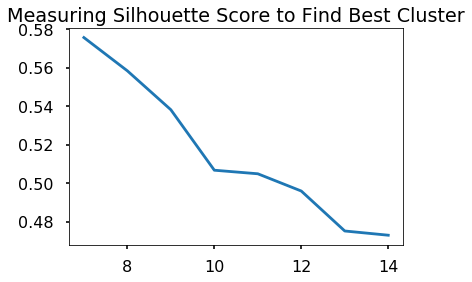

In [537]:
def kmeans(reduced_data, n_clusters):
    """
    performs kmeans clustering and returns labels, centroids, inertia, and silhouette score
    """
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans = kmeans.fit(reduced_data)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia = kmeans.inertia_
    sil_score = metrics.silhouette_score(reduced_data, kmeans.labels_, metric='sqeuclidean')

    data_dictionary = {
        "labels": labels,
        "centroids": centroids,
        "inertia" : inertia,
        "silhouette_score": sil_score
    }

    return data_dictionary

def find_best_cluster(data,a,b):
    """
    plots and finds the best silhouette score for range(a,b)
    """
    scores = []
    for i in range(a,b):
        i_clusters = kmeans(data, i)
        sil_score_i = i_clusters['silhouette_score']
        scores.append(sil_score_i)

    sns.set_context('poster', font_scale=1)
    plt.plot(range(a,b), scores)
    plt.title("""Measuring Silhouette Score to Find Best Cluster""")
    print("best silhouette score:", np.max(scores))
find_best_cluster(LDA_reduced_df,7,15)

In [538]:
kmeans = kmeans(LDA_reduced_df, 8)

In [539]:
modern_data['Cluster'] = kmeans['labels']
y = kmeans['labels']
df = pd.DataFrame({'X1':LDA_reduced_df[:,0],'X2':LDA_reduced_df[:,1]})

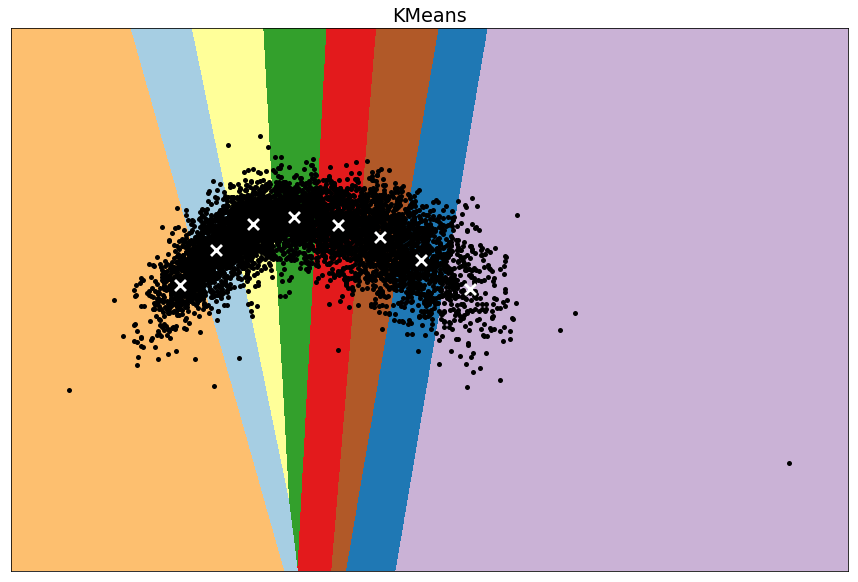

In [540]:
def plot_kmeans_cluster(reduced_data, k_clusters, plot_title):
    kmeans = KMeans(init='k-means++', n_clusters=k_clusters, n_init=80)
    kmeans.fit(reduced_data)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .0025     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(15,10))
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=10)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=120, linewidths=2,
            color='w', zorder=10)
    plt.title(plot_title)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

plot_kmeans_cluster(LDA_reduced_df, k_clusters=8, plot_title="""KMeans""")

In [541]:
def feature_importance(cluster_data, league_data):
    """
    takes reduced data,
    performs Principal Component Analysis,
    returns feature importance dataframe
    """
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(cluster_data)

    pca = PCA(n_components=2)
    PCA_reduced_df = pca.fit(scaled_data).transform(scaled_data)

    features = pd.DataFrame(zip(cluster_data.columns, pca.components_[0], np.mean(cluster_data), np.mean(league_data)),
        columns=['Feature', 'Importance', 'Cluster Average', 'League Average']).sort_values('Importance', ascending=False).head(10)

    return features

In [563]:
i = 0
mask = (modern_data['Cluster'] == i)

cluster_data = modern_data[mask][["3PAr", "FTr", "TRB%", "AST%", "STL%", "BLK%", "TOV%", "USG%", "TS%", "AST/36", "PTS/36", "DWS", "DBPM","PPS_00-02 At Rim","PPS_03-08 Near Rim","PPS_09-12 Short Range","PPS_13-17 Mid Range","PPS_18-23 Long Jumper","PPS_24-27 Three","PPS_28-34 Deep"]]
league_data = modern_data[["3PAr", "FTr", "TRB%", "AST%", "STL%", "BLK%", "TOV%", "USG%", "TS%", "AST/36", "PTS/36", "DWS", "DBPM","PPS_00-02 At Rim","PPS_03-08 Near Rim","PPS_09-12 Short Range","PPS_13-17 Mid Range","PPS_18-23 Long Jumper","PPS_24-27 Three","PPS_28-34 Deep"]]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

pca = PCA(n_components=2)
PCA_reduced_df = pca.fit(scaled_data).transform(scaled_data)

npmc = np.mean(cluster_data)
npml = np.mean(league_data)

features = pd.DataFrame(list(zip(cluster_data.columns, pca.components_[0], npmc, npml)), columns=['Feature', 'Importance', 'Cluster Average', 'League Average']).sort_values('Importance', ascending=False)#.head(10)
features["%diff"] = (features["Cluster Average"]-features["League Average"])/abs(features["League Average"]) *100
features["Cluster"] = i
features["level"] = np.where((features["%diff"] < -70), "F",
                             np.where((features["%diff"] < -20), "D", 
                             np.where((features["%diff"] < 20), "C", 
                             np.where((features["%diff"] < 70), "B", 
                             "A"
                            ))))

features

,Feature,Importance,Cluster Average,League Average,%diff,Cluster,level
3,AST%,0.372660,32.165677,13.855425,132.152214,0,A
11,DWS,0.347179,1.500495,1.700950,-11.784904,0,C
9,AST/36,0.324206,7.099907,3.042383,133.366660,0,A
2,TRB%,0.314718,5.391914,10.206843,-47.173537,0,D
10,PTS/36,0.299054,14.370246,14.114503,1.811919,0,C
7,USG%,0.282489,20.663201,19.221242,7.501906,0,C
12,DBPM,0.269288,-1.457096,-0.038064,-3727.983860,0,F
8,TS%,0.244651,0.519460,0.530299,-2.043820,0,C
13,PPS_00-02 At Rim,0.234775,1.115391,1.216406,-8.304353,0,C
1,FTr,0.204462,0.265073,0.299567,-11.514822,0,C


In [564]:
modern_data.loc[modern_data["Cluster"]==i]

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,formatname,playername,PPS_00-02 At Rim,PPS_03-08 Near Rim,PPS_09-12 Short Range,PPS_13-17 Mid Range,PPS_18-23 Long Jumper,PPS_24-27 Three,PPS_28-34 Deep,PPS_35-46 Near Half,PPS_47-94 Backcourt,Points_00-02 At Rim,Points_03-08 Near Rim,Points_09-12 Short Range,Points_13-17 Mid Range,Points_18-23 Long Jumper,Points_24-27 Three,Points_28-34 Deep,Points_35-46 Near Half,Points_47-94 Backcourt,TRB/36,AST/36,STL/36,BLK/36,TOV/36,PF/36,PTS/36,Cluster
10731,1997.0,Cory Alexander,G,23.0,SAS,80.0,1454.0,14.3,0.528,0.514,0.263,2.3,8.0,5.1,30.0,3.1,0.9,21.1,22.2,0.5,0.6,1.1,0.035,0.8,-2.1,-1.3,0.2,194.0,490.0,0.3960,94.0,252.0,0.373,100.0,238.0,0.420,0.492,95.0,129.0,0.736000,29.0,94.0,123.0,254.0,82.0,16.0,146.0,148.0,577.0,CoryAlexander,Cory Alexander,0.836364,1.000000,0.933333,0.558140,0.784483,1.260870,0.000000,0.000000,0.0,92.0,18.0,14.0,24.0,182.0,87.0,0.0,0.0,0.0,3.045392,6.288858,2.030261,0.396149,3.614856,3.664374,14.286107,0
10737,1997.0,Kenny Anderson,G,26.0,POR,82.0,3081.0,19.5,0.540,0.322,0.383,3.6,10.2,7.0,31.7,2.8,0.4,12.7,22.2,8.0,4.4,12.4,0.193,4.3,0.8,5.0,5.5,485.0,1137.0,0.4270,132.0,366.0,0.361,353.0,771.0,0.458,0.485,334.0,435.0,0.768000,91.0,272.0,363.0,584.0,162.0,15.0,193.0,222.0,1436.0,KennyAnderson,Kenny Anderson,1.034483,0.658537,0.600000,0.793388,0.804598,0.907895,1.000000,0.000000,0.0,450.0,54.0,42.0,96.0,280.0,69.0,3.0,0.0,0.0,4.241480,6.823759,1.892892,0.175268,2.255112,2.593963,16.778968,0
10741,1997.0,Greg Anthony,G,29.0,VAN,65.0,1863.0,16.6,0.526,0.469,0.351,1.5,10.0,5.7,36.1,3.8,0.2,18.1,17.8,2.3,1.2,3.5,0.090,1.3,-1.5,-0.3,0.8,199.0,507.0,0.3930,88.0,238.0,0.370,111.0,269.0,0.413,0.479,130.0,178.0,0.730000,25.0,159.0,184.0,407.0,129.0,4.0,129.0,122.0,616.0,GregAnthony,Greg Anthony,0.971014,1.166667,0.769231,0.533333,0.729167,1.129870,0.000000,0.000000,0.0,134.0,14.0,20.0,32.0,140.0,87.0,0.0,0.0,0.0,3.555556,7.864734,2.492754,0.077295,2.492754,2.357488,11.903382,0
10743,1997.0,Darrell Armstrong,G,28.0,ORL,67.0,1010.0,14.7,0.525,0.525,0.307,4.0,4.9,4.4,29.7,3.3,0.7,20.2,22.4,0.7,1.1,1.8,0.085,0.9,-1.7,-0.7,0.3,132.0,345.0,0.3830,55.0,181.0,0.304,77.0,164.0,0.470,0.462,92.0,106.0,0.868000,35.0,41.0,76.0,175.0,61.0,9.0,99.0,114.0,411.0,DarrellArmstrong,Darrell Armstrong,1.066667,1.176471,0.909091,0.625000,0.662069,0.767442,0.000000,0.000000,0.0,96.0,20.0,10.0,20.0,96.0,33.0,0.0,0.0,0.0,2.708911,6.237624,2.174257,0.320792,3.528713,4.063366,14.649505,0
10755,1997.0,Travis Best,G,24.0,IND,76.0,2064.0,13.3,0.533,0.250,0.318,2.1,7.4,4.8,26.4,2.6,0.2,17.8,19.3,1.8,2.3,4.1,0.096,0.6,-0.2,0.4,1.3,274.0,620.0,0.4420,57.0,155.0,0.368,217.0,465.0,0.467,0.488,149.0,197.0,0.756000,36.0,130.0,166.0,318.0,98.0,5.0,153.0,221.0,754.0,TravisBest,Travis Best,1.051429,0.857143,0.777778,0.814815,0.852018,1.050000,0.000000,0.000000,0.0,184.0,30.0,28.0,88.0,190.0,42.0,0.0,0.0,0.0,2.895349,5.546512,1.709302,0.087209,2.668605,3.854651,13.151163,0
10758,1997.0,Muggsy Bogues,G,32.0,CHH,65.0,1880.0,15.7,0.554,0.325,0.144,1.7,7.2,4.5,38.6,2.4,0.1,18.6,14.5,3.9,1.1,5.0,0.127,1.3,-2.7,-1.3,0.3,204.0,443.0,0.4600,60.0,144.0,0.417,144.0,299.0,0.482,0.528,54.0,64.0,0.844000,25.0,116.0,141.0,469.0,82.0,2.0,108.0,114.0,522.0,MuggsyBogues,Muggsy Bogues,0.596774,0.615385,1.058824,1.092784,1.172840,0.642857,0.000000,0.000000,0.0,74.0,8.0,18.0,106.0,190.0,18.0,0.0,0.0,0.0,2.700000,8.980851,1.570213,0.038298,2.068085,2.182979,9.995745,0
10765,1997.0,Terrell Brandon,G,26.0,CLE,78.0,2868.0,21.5,0.526,0.206,0.226,2.1,11.7,6.8,35.6,2.8,0.9,11.0,28.3,6.2,4.7,10.8,0.181,3.8,0.8,4.6,4.8,575.0,1313.0,0.4380,101.0,271.0,0.373,474.0,1042.0,0.455,0.476,268.0,297.0,0.902000,48.0,253.0,301.0,490.0,138.0,30.0,178.0,177.0,1519.0,TerrellBrandon,Terrell Brandon,1.111111,0.816901,0.644444,0.860465,0.859729,1.114286,0.000000,1.500000,0.0,230.0,58.0,58.0,370.0,380.0

In [565]:
modern_data.loc[(modern_data["formatname"]=="KembaWalker")]

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,formatname,playername,PPS_00-02 At Rim,PPS_03-08 Near Rim,PPS_09-12 Short Range,PPS_13-17 Mid Range,PPS_18-23 Long Jumper,PPS_24-27 Three,PPS_28-34 Deep,PPS_35-46 Near Half,PPS_47-94 Backcourt,Points_00-02 At Rim,Points_03-08 Near Rim,Points_09-12 Short Range,Points_13-17 Mid Range,Points_18-23 Long Jumper,Points_24-27 Three,Points_28-34 Deep,Points_35-46 Near Half,Points_47-94 Backcourt,TRB/36,AST/36,STL/36,BLK/36,TOV/36,PF/36,PTS/36,Cluster
17848,2012.0,Kemba Walker,G,21.0,CHA,66.0,1792.0,14.9,0.464,0.295,0.278,1.9,13.5,7.5,30.2,1.8,0.8,12.1,25.2,-0.2,0.5,0.3,0.009,0.6,-1.8,-1.2,0.3,281.0,767.0,0.366,69.0,226.0,0.305,212.0,541.0,0.392,0.411,168.0,213.0,0.789,30.0,204.0,234.0,289.0,60.0,20.0,119.0,79.0,799.0,KembaWalker,Kemba Walker,1.000000,0.622951,0.857143,0.652482,0.714286,0.949749,0.000000,0.0,0.00,166.0,38.0,30.0,92.0,110.0,189.0,0.0,0.0,0.0,4.700893,5.805804,1.205357,0.401786,2.390625,1.587054,16.051339,6
18319,2013.0,Kemba Walker,G,22.0,CHA,82.0,2859.0,18.8,0.517,0.267,0.298,2.3,9.2,5.7,31.2,2.9,0.9,12.4,25.6,3.7,1.1,4.8,0.080,3.2,-1.7,1.5,2.5,526.0,1244.0,0.423,107.0,332.0,0.322,419.0,912.0,0.459,0.466,296.0,371.0,0.798,60.0,223.0,283.0,471.0,160.0,31.0,200.0,153.0,1455.0,KembaWalker,Kemba Walker,1.095745,0.615385,0.641975,0.981481,0.721088,1.014085,0.562500,0.0,0.00,412.0,72.0,52.0,212.0,106.0,288.0,9.0,0.0,0.0,3.563484,5.930745,2.014690,0.390346,2.518363,1.926548,18.321091,0
18802,2014.0,Kemba Walker,G,23.0,CHA,73.0,2614.0,16.8,0.499,0.286,0.295,1.7,11.6,6.6,29.7,1.7,1.0,11.6,25.8,1.8,3.3,5.1,0.093,1.6,0.2,1.7,2.4,449.0,1143.0,0.393,109.0,327.0,0.333,340.0,816.0,0.417,0.441,282.0,337.0,0.837,39.0,267.0,306.0,447.0,86.0,32.0,169.0,128.0,1289.0,KembaWalker,Kemba Walker,1.027668,0.698795,0.735294,0.783582,0.706587,1.042553,0.818182,0.0,0.00,260.0,58.0,50.0,210.0,118.0,294.0,9.0,0.0,0.0,4.214231,6.156083,1.184392,0.440704,2.327467,1.762816,17.752104,6
19293,2015.0,Kemba Walker,G,24.0,CHO,62.0,2119.0,17.6,0.486,0.285,0.288,1.8,9.9,5.7,27.1,2.2,1.2,8.3,25.9,1.8,2.6,4.5,0.101,2.2,0.1,2.2,2.3,378.0,981.0,0.385,85.0,280.0,0.304,293.0,701.0,0.418,0.429,234.0,283.0,0.827,35.0,185.0,220.0,318.0,89.0,31.0,100.0,92.0,1075.0,KembaWalker,Kemba Walker,0.988142,0.787879,0.507042,0.727273,0.852459,0.995745,0.461538,0.0,0.00,250.0,78.0,36.0,128.0,104.0,234.0,6.0,0.0,0.0,3.737612,5.402548,1.512034,0.526664,1.698915,1.563001,18.263332,6
19769,2016.0,Kemba Walker,G,25.0,CHO,81.0,2885.0,20.8,0.554,0.368,0.329,2.1,11.5,6.8,25.7,2.2,1.1,10.1,26.5,6.3,3.6,9.9,0.165,4.0,0.0,4.0,4.4,568.0,1331.0,0.427,182.0,490.0,0.371,386.0,841.0,0.459,0.495,371.0,438.0,0.847,56.0,301.0,357.0,421.0,126.0,39.0,171.0,111.0,1689.0,KembaWalker,Kemba Walker,1.198795,0.654545,0.835821,0.748466,0.733945,1.139151,0.500000,0.0,0.75,398.0,72.0,56.0,122.0,160.0,483.0,6.0,0.0,3.0,4.454766,5.253380,1.572270,0.486655,2.133795,1.385095,21.075910,6
20251,2017.0,Kemba Walker,G,26.0,CHO,79.0,2739.0,21.3,0.569,0.415,0.248,1.8,10.6,6.2,29.1,1.6,0.7,9.5,29.2,5.9,2.2,8.1,0.142,5.3,-1.7,3.6,3.9,643.0,1449.0,0.444,240.0,602.0,0.399,403.0,847.0,0.476,0.527,304.0,359.0,0.847,45.0,263.0,308.0,435.0,85.0,22.0,168.0,119.0,1830.0,KembaWalker,Kemba Walker,1.097506,0.632911,0.792453,0.867925,0.794872,1.238636,0.600000,0.0,0.00,484.0,50.0,42.0,138.0,124.0,654.0,18.0,0.0,0.0,4.048193,5.717415,1.117196,0.289157,2.208105,1.564074,24.052574,6
20783,2018.0,Kemba Walker\walkeke02,G,27.0,CHO,80.0,2736.0,20.6,0.572,0.441,0.308,1.2,8.7,4.9,27.4,1.6,0.7,10.4,27.4,6.5,2.0,8.5,0.150,5.1,-1.9,3.2,3.6,588.0,1363.0,0.431,231.0,601.0,0.384,357.0,762.0,0.469,0.516,363.0,420.0,0.864,31.0,216.0,247.0,444.0,91.0,24.0,179.0,98.0,1770.0,KembaWalker,Kemba Walker,1.149351,0.591837,0.857143,0.911392,0.760563,1.203390,0.656250,0.0,0.00,354.0,58.0,72.0,144.0,108.0,639.0,21.0,0.0,0.0,3.250000,5.842105,1.197368,0.3157